## Arsenic_prediction_Experiment_5_MLP-GNN-model (PyTorch)

##### Loading the libraries and the dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets 
from IPython.display import display 
import pylab
from sklearn.compose import ColumnTransformer
import sklearn
from sklearn.utils import shuffle

In [2]:
from numpy import genfromtxt
from numpy import asarray
from numpy import savetxt
import networkx as nx
import math

In [3]:
df_arsenic_prelim = pd.read_csv (r'C:\Users\Ryan\Desktop\Research\Data\Prelim-data\as.csv')

In [4]:
df_arsenic_prelim

,SiteID,As,X_Albers,Y_Albers,WellDepth,AvgAnnualN_CAFO_1992_97,AvgAnnualN_Fert_1992_2001,AWC,AWS25,BFI,...,Transmiss,TWI,VRT,VWC,YngWtrMeanAge,YngWtrMeanAge_VertMean,DTW,Data,as10,Pred
0,1,6.0,924000.0,2006000.0,105.912831,16.678065,48.483771,0.141277,5.384314,21.0,...,143.362904,9.902970,5.956547,0.304000,23.158235,17.689265,3.082386,train,0.0,0.00
1,2,1.0,892000.0,2080000.0,54.861323,7.688502,50.638261,0.217775,7.311919,37.0,...,137.152244,9.067347,4.196766,0.343552,22.015855,17.739371,3.076582,train,0.0,0.06
2,3,13.0,886000.0,2066000.0,34.745504,6.245885,43.503552,0.140200,5.400000,33.0,...,121.646066,11.470297,17.558480,0.270166,17.762669,15.950136,5.645093,train,1.0,0.83
3,4,1.0,898000.0,2076000.0,59.737885,4.900404,34.132068,0.154753,5.318469,37.0,...,298.232568,9.815662,1.231952,0.328985,27.709500,17.589893,1.044807,train,0.0,0.03
4,5,2.0,896000.0,2062000.0,45.717769,6.511748,45.355325,0.140200,5.400000,28.0,...,97.123320,9.435353,21.539828,0.268193,19.238581,14.557619,8.535328,train,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,1.0,610000.0,2484000.0,19.506248,8.030330,10.843744,0.159466,4.090000,59.0,...,115.224598,13.790910,0.416030,0.344196,8.765928,16.686542,0.188501,test,0.0,0.11
9998,9999,6.0,616000.0,2526000.0,24.992380,0.158934,0.199489,0.126106,4.030000,63.0,...,40.882361,11.154347,1.048951,0.253424,15.627269,11.281490,1.518130,test,0.0,0.01
9999,10000,0.0,602000.0,2586000.0,26.211521,0.004975,0.015434,0.126106,4.030000,66.0,...,59.112810,13.113131,0.520421,0.280687,21.815356,15.832110,0.643534,test,0.0,0.05
10000,10001,0.0,668000.0,2620000.0,12.496190,0.028986,0.058744,0.066700,2.000000,62.0,...,59.639661,12.550000,0.098656,0.367925,5.079691,14.141643,0.114506,test,0.0,0.01


In [5]:
df_arsenic_prelim.isnull().values.any()
df_arsenic_prelim.isnull().sum()
df_arsenic_prelim = df_arsenic_prelim.dropna()

In [6]:
df_arsenic_prelim.shape

(7616, 87)

In [7]:
X = df_arsenic_prelim.iloc[:,4:-3]
Y_TRUE = df_arsenic_prelim.iloc[:,1]
Y_PRED_BIN = df_arsenic_prelim.iloc[:,-2]
Y_PRED_CONTINUOUS = df_arsenic_prelim.iloc[:,-1]
X_spatial_coods = df_arsenic_prelim.iloc[:,2:4]

In [8]:
X_spatial_coods.shape

(7616, 2)

In [9]:
Y_TRUE
r = np.ptp(Y_TRUE)
print("Range:", r)
print("Max:",max(Y_TRUE))
print("Max:",min(Y_TRUE))

Range: 280.0
Max: 280.0
Max: 0.0


In [10]:
print('Shape of X: ', X.shape)
print('Shape of Y_TRUE: ', Y_TRUE.shape)
print('Shape of Y_PRED_BIN: ', Y_PRED_BIN.shape)
print('Shape of Y_PRED_CONFIDENCE: ', Y_PRED_CONTINUOUS.shape)

Shape of X:  (7616, 80)
Shape of Y_TRUE:  (7616,)
Shape of Y_PRED_BIN:  (7616,)
Shape of Y_PRED_CONFIDENCE:  (7616,)


In [11]:
No_of_train_samples = int((X.shape[0] * 90) / 100)
remaining_samples = X.shape[0] - No_of_train_samples
TrainX = np.array(X.iloc[:No_of_train_samples,:])
TrainY = np.array(Y_TRUE)[:No_of_train_samples]

No_of_valid_samples = int((TrainX.shape[0] * 90) / 100)
ValidX = TrainX[No_of_valid_samples:,:]
ValidY = TrainY[No_of_valid_samples:]

TrainX = TrainX[:No_of_valid_samples,:]
TrainY = TrainY[:No_of_valid_samples]

TestX = np.array(X.iloc[No_of_train_samples:,:])
TestY = np.array(Y_TRUE)[No_of_train_samples:]
Test_old_pred = np.array(Y_PRED_CONTINUOUS)[No_of_train_samples:]

In [12]:
TrainY.shape

(6168,)

In [13]:
print(TrainX.shape)
print(TrainY.shape)
print(ValidX.shape)
print(ValidY.shape)
print(TestX.shape)
print(TestY.shape)
print(Test_old_pred.shape)

(6168, 80)
(6168,)
(686, 80)
(686,)
(762, 80)
(762,)
(762,)


In [14]:
Train_spatial =  np.array(X_spatial_coods.iloc[:No_of_train_samples,:])

Valid_spatial = Train_spatial[No_of_valid_samples:,:]
Train_spatial =  Train_spatial[:No_of_valid_samples,:]

Test_spatial =  np.array(X_spatial_coods.iloc[No_of_train_samples:,:])

In [15]:
print(Train_spatial.shape)
print(Valid_spatial.shape)
print(Test_spatial.shape)

(6168, 2)
(686, 2)
(762, 2)


##### Scaling the X and Y data-points

In [16]:
#scaler_1 = sklearn.preprocessing.StandardScaler()
scaler_1 = sklearn.preprocessing.MinMaxScaler()
scaler_1 = scaler_1.fit(TrainX)

TrainX = scaler_1.transform(TrainX)
TestX = scaler_1.transform(TestX)
ValidX = scaler_1.transform(ValidX)

#scaler_2 = sklearn.preprocessing.StandardScaler()
scaler_2 = sklearn.preprocessing.MinMaxScaler()
scaler_2 = scaler_2.fit(TrainY.reshape(-1,1))

TrainY = scaler_2.transform(TrainY.reshape(-1,1))
TestY = scaler_2.transform(TestY.reshape(-1,1))
ValidY = scaler_2.transform(ValidY.reshape(-1,1))


TrainY = TrainY.reshape(-1)
TestY = TestY.reshape(-1)
ValidY = ValidY.reshape(-1)

In [17]:
print(TrainY.shape)

(6168,)


In [18]:
print(TrainX.shape)
print(TrainY.shape)
print(ValidX.shape)
print(ValidY.shape)
print(TestX.shape)
print(TestY.shape)
print(Test_old_pred.shape)

(6168, 80)
(6168,)
(686, 80)
(686,)
(762, 80)
(762,)
(762,)


In [19]:
print('Shape of TrainX: ', TrainX.shape)
print('Shape of TestX: ', TestX.shape)
print('Shape of TrainY: ', TrainY.shape)
print('Shape of TestY: ', TestY.shape) 

Shape of TrainX:  (6168, 80)
Shape of TestX:  (762, 80)
Shape of TrainY:  (6168,)
Shape of TestY:  (762,)


##### Preparing the graph

In [20]:
print('Shape of Train_spatial:',Train_spatial.shape)
print('Shape of Test_spatial:',Test_spatial.shape)

Shape of Train_spatial: (6168, 2)
Shape of Test_spatial: (762, 2)


In [21]:
no_of_train_samples = TrainX.shape[0]
no_of_test_samples = TestX.shape[0]
no_of_valid_samples = ValidX.shape[0]

Train_euclidean = np.empty((no_of_train_samples,no_of_train_samples))
Valid_euclidean = np.empty((no_of_valid_samples,no_of_valid_samples))
Test_euclidean = np.empty((no_of_test_samples,no_of_test_samples))

In [22]:
Train_euclidean.shape

(6168, 6168)

In [23]:
for i in range(no_of_train_samples):
    for j in range(no_of_train_samples):
        a = Train_spatial[i,0],Train_spatial[i,1]
        b = Train_spatial[j,0],Train_spatial[j,1]
        dist = [(a - b)**2 for a, b in zip(a, b)]
        Train_euclidean[i,j] = math.sqrt(sum(dist))

In [24]:
for i in range(no_of_valid_samples):
    for j in range(no_of_valid_samples):
        a = Valid_spatial[i,0],Valid_spatial[i,1]
        b = Valid_spatial[j,0],Valid_spatial[j,1]
        dist = [(a - b)**2 for a, b in zip(a, b)]
        Valid_euclidean[i,j] = math.sqrt(sum(dist))

In [25]:
Valid_euclidean.shape

(686, 686)

In [26]:
Train_euclidean.shape 

(6168, 6168)

In [27]:
for i in range(no_of_test_samples):
    for j in range(no_of_test_samples):
        a = Test_spatial[i,0],Test_spatial[i,1]
        b = Test_spatial[j,0],Test_spatial[j,1]
        dist = [(a - b)**2 for a, b in zip(a, b)]
        Test_euclidean[i,j] = math.sqrt(sum(dist))

In [28]:
Test_euclidean.shape

(762, 762)

In [29]:
Train_edges = np.empty((no_of_train_samples,no_of_train_samples))
Valid_edges = np.empty((no_of_valid_samples,no_of_valid_samples))
Test_edges = np.empty((no_of_test_samples,no_of_test_samples))

In [30]:
cut_off_val = 2000

In [31]:
for i in range(no_of_train_samples):
    for j in range(no_of_train_samples):
        if (Train_euclidean[i,j] < cut_off_val) and i!=j:
            Train_edges[i,j]=1

In [32]:
Train_edges.shape

(6168, 6168)

In [33]:
for i in range(no_of_valid_samples):
    for j in range(no_of_valid_samples):
        if (Valid_euclidean[i,j] < cut_off_val) and i!=j :
            Valid_edges[i,j]=1

In [34]:
Valid_edges.shape

(686, 686)

In [35]:
for i in range(no_of_test_samples):
    for j in range(no_of_test_samples):
        if (Test_euclidean[i,j] < cut_off_val) and i!=j:
            Test_edges[i,j]=1

In [36]:
Test_edges.shape

(762, 762)

In [37]:
import os
import sys
import torch
from context import update_path

update_path(os.path.join("..", "HydroLearn_Dev"))

import Utility as util
from Container import Container
from Models.Model import Model, GNN, SummaryWriter, StandardLoader, batch_sampler_collate

##### Packaging all the model variables

In [38]:
class Variables(Container):

    def __init__(self):
        self.training = self.training_var(Container())
        self.checkpointing = self.checkpointing_var(Container())
        self.distribution = self.distribution_var(Container())

    def training_var(self, con):
        con.set("train", True)
        con.set("n_epochs", 100)
        con.set("early_stop_epochs", -1)
        con.set("mbatch_size", 512)
        con.set("lr", 0.001)
        con.set("lr_decay", 0.0)
        con.set("param_lr_map", {})
        con.set("gradient_clip", None)
        con.set("regularization", 0.0)
        con.set("l1_reg", 0.0)
        con.set("l2_reg", 0.0)
        con.set("optimizer", "SGD")
        con.set("loss", "MSELoss")
        con.set("initializer", None)
        con.set("initialization_seed", 0)
        con.set("batch_shuffle_seed", 0)
        con.set("use_gpu", True)
        con.set("gpu_data_mapping", "all")
        con.set("partition_indices", None, "train")
        con.set("partition_indices", None, "valid")
        con.set("partition_indices", None, "test")
        return con

    def checkpointing_var(self, con):
        con.set("checkpoint_dir", "Checkpoints")
        con.set("checkpoint_epochs", -1)
        return con
    
    def distribution_var(self, con):
        con.root_process_rank = 0
        con.process_rank = 0
        con.n_processes = 1
        con.set("n_processes", con.n_processes, "train")
        con.set("n_processes", 1, "valid")
        con.set("n_processes", 1, "test")
        con.nonroot_process_ranks = util.get_nonroot_process_ranks(con.root_process_rank, con.n_processes)
        con.set(
            "nonroot_process_ranks",
            util.get_nonroot_process_ranks(con.root_process_rank, con.get("n_processes", "train")),
            "train"
        )
        con.set(
            "nonroot_process_ranks",
            util.get_nonroot_process_ranks(con.root_process_rank, con.get("n_processes", "valid")),
            "valid"
        )
        con.set(
            "nonroot_process_ranks",
            util.get_nonroot_process_ranks(con.root_process_rank, con.get("n_processes", "test")),
            "test"
        )
        con.backend = "gloo"
        con.nersc = False
        return con

In [39]:
def lecun_normal_(tensor: torch.Tensor) -> torch.Tensor:
    input_size = tensor.shape[-1] # Assuming that the weights' input dimension is the last.
    std = math.sqrt(1/input_size)
    with torch.no_grad():
        return tensor.normal_(-std,std)

In [40]:
class _StandardLoader(StandardLoader):
    
    def sampled_items(self):
        return []

##### Defning the model

In [42]:
class MLPGNN(Model):

    def __init__(self, in_size, out_size, hidden_size, dropout=0.0):
        super(MLPGNN, self).__init__()
        # layers
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(in_size, 200),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(200, 80),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(80, 75),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(75, 54),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(54, 32),
            torch.nn.SELU(),
            torch.nn.Dropout(dropout),
        )
        self.gnn = GNN(32, 32, 32, n_hops=1, dropout=dropout)
        self.out_proj = torch.nn.Linear(32, out_size)
        self.out_proj_act = torch.nn.Identity()

    def forward(self, inputs):
#        self.debug = 1
        self.gnn.debug = self.debug
        x = inputs["X"]
        edge_indices = inputs["edge_indices"]
        if self.debug:
            print("x =", x.shape)
            print("edge_indices =", edge_indices.shape)
        a = self.mlp(x)
        if self.debug:
            print("mlp out =", a.shape)
        b = self.gnn(X=a, edge_indices=edge_indices)["Yhat"]
        if self.debug:
            print("gnn out =", b.shape)
        output = self.out_proj(b)
        if self.debug:
            print("out_proj out =", output.shape)
        fin_res = self.out_proj_act(output)
        if self.debug:
            sys.exit(1)
        return {"Yhat": fin_res}

    def optimize(self, train, valid, test, var):
        self.use_gpu = var.use_gpu
        self.all_to_gpu = var.use_gpu and var.gpu_data_mapping == "all"
        self.mbatches_to_gpu = var.use_gpu and var.gpu_data_mapping == "minibatch"
        self, train = self.prepare(train, var.use_gpu)
        # Initialize loaders, loss, optimizer, parameters, etc
        train_iterable = self.LoaderDatasetClass()(train, var)
        sampler = torch.utils.data.BatchSampler(
            torch.utils.data.RandomSampler(
                train_iterable,
                generator=torch.Generator().manual_seed(
                    var.batch_shuffle_seed if var.batch_shuffle_seed > -1 else time.time()
                )
            ),
            var.mbatch_size,
            True
        )
        train_loader = torch.utils.data.DataLoader(
            train_iterable,
            sampler=sampler,
            collate_fn=batch_sampler_collate,
        )
        if not valid is None:
            self, valid = self.prepare(valid, var.use_gpu)
            valid_iterable = self.LoaderDatasetClass()(valid, var)
            sampler = torch.utils.data.BatchSampler(
                torch.utils.data.SequentialSampler(valid_iterable),
                var.mbatch_size,
                False
            )
            valid_loader = torch.utils.data.DataLoader(
                valid_iterable,
                sampler=sampler,
                collate_fn=batch_sampler_collate,
            )
        if not test is None:
            self, test = self.prepare(test, var.use_gpu)
            test_iterable = self.LoaderDatasetClass()(test, var)
            sampler = torch.utils.data.BatchSampler(
                torch.utils.data.SequentialSampler(test_iterable),
                var.mbatch_size,
                False
            )
            test_loader = torch.utils.data.DataLoader(
                test_iterable,
                sampler=sampler,
                collate_fn=batch_sampler_collate,
            )
        self.crit = self.criterion(var)
        self.opt = self.optimizer(var)
        self.init_params(var.initializer, var.initialization_seed)
        self.summary_writer = SummaryWriter(var.checkpoint_dir)
        self.summary_writer.add_text("Model", str(self).replace("\n", "\n\n"))
        # Commence optimization
        self.train_losses, self.valid_losses, self.test_losses = [], [], []
        n_plateau_epochs, min_valid_loss = 0, sys.float_info.max
        for epoch in range(var.n_epochs+1):
            print(35 * "+")
            self.train()
            var.current_partition = "train"
            epoch_loss, n_sample = 0, 0
            self.pre_epoch_update(train, train_loader, valid, valid_loader, test, test_loader, epoch, var)
            for mb_in in train_loader: # Training set pass
                mb_in = util.merge_dicts(mb_in, train, False)
                if self.mbatches_to_gpu:
                    start = time.time()
                    for key in mb_in.keys():
                        mb_in[key] = util.to_device(mb_in[key], util.get_device(True))
                    self.to_gpu_time += time.time() - start
                mb_out = self.forward(mb_in)
                if self.mbatches_to_gpu:
                    start = time.time()
                    for key in mb_in.keys():
                        mb_in[key] = util.to_device(mb_in[key], util.get_device(False))
                    self.to_cpu_time += time.time() - start
                mb_loss = self.loss(mb_in, mb_out, var)
                if epoch > 0:
                    self.step(mb_loss, mb_in, mb_out, var)
                epoch_loss += self.loss_to_numeric(mb_loss, var)
            epoch_loss /= len(train_loader)
            self.train_losses += [epoch_loss]
            print("Epoch %d : Train Loss = %.5f" % (epoch, epoch_loss))
            self.eval()
            self.post_epoch_update(train, train_loader, valid, valid_loader, test, test_loader, epoch, var)
            if not valid is None: # Validation set pass
                with torch.set_grad_enabled(False):
                    var.current_partition = "valid"
                    epoch_loss, n_sample = 0, 0
                    for mb_in in valid_loader:
                        mb_in = util.merge_dicts(mb_in, valid, False)
                        if self.mbatches_to_gpu:
                            start = time.time()
                            for key in mb_in.keys():
                                mb_in[key] = util.to_device(mb_in[key], util.get_device(True))
                            self.to_gpu_time += time.time() - start
                        mb_out = self.forward(mb_in)
                        if self.mbatches_to_gpu:
                            start = time.time()
                            for key in mb_in.keys():
                                mb_in[key] = util.to_device(mb_in[key], util.get_device(False))
                            self.to_cpu_time += time.time() - start
                        mb_loss = self.loss(mb_in, mb_out,var)
                        epoch_loss += self.loss_to_numeric(mb_loss, var)
                    epoch_loss /= len(valid_loader)
                    print("Epoch %d : Valid Loss = %.5f" % (epoch, epoch_loss))
                    self.valid_losses += [epoch_loss]
                    if epoch_loss < min_valid_loss: # Check for improvement and update early stopping
                        min_valid_loss = epoch_loss
                        n_plateau_epochs = 0
                        path = os.sep.join([var.checkpoint_dir, "Best.pth"])
                        self.checkpoint(path)
                    else:
                        n_plateau_epochs += 1
                        if var.early_stop_epochs > 0 and n_plateau_epochs % var.early_stop_epochs == 0:
                            break
            if not test is None: # Testing set pass
                with torch.set_grad_enabled(False):
                    var.current_partition = "test"
                    epoch_loss, n_sample = 0, 0
                    for mb_in in test_loader:
                        mb_in = util.merge_dicts(mb_in, test, False)
                        if self.mbatches_to_gpu:
                            start = time.time()
                            for key in mb_in.keys():
                                mb_in[key] = util.to_device(mb_in[key], util.get_device(True))
                            self.to_cpu_time += time.time() - start
                        mb_out = self.forward(mb_in)
                        if self.mbatches_to_gpu:
                            start = time.time()
                            for key in mb_in.keys():
                                mb_in[key] = util.to_device(mb_in[key], util.get_device(False))
                            self.to_cpu_time += time.time() - start
                        mb_loss = self.loss(mb_in, mb_out, var)
                        epoch_loss += self.loss_to_numeric(mb_loss, var)
                    epoch_loss /= len(test_loader)
                    print("Epoch %d :  Test Loss = %.5f" % (epoch, epoch_loss))
                    self.test_losses += [epoch_loss]
            print(35 * "+")
            self.update_optimizer(epoch, var)
            self.log_epoch_info(train, train_loader, valid, valid_loader, test, test_loader, epoch, var)
        self.summary_writer.close()
        # Save final model
        path = os.sep.join([var.checkpoint_dir, "Final.pth"])
        self.checkpoint(path)
        # Return data to original device (cpu), shape, and type (NumPy.ndarray)
        self, train = self.prepare(train, False, True)
        if not valid_X is None and valid_Y is None:
            self, valid = self.prepare(valid, False, True)
        if not test_X is None and test_Y is None:
            self, test = self.prepare(test, False, True)

    def LoaderDatasetClass(self):
        return _StandardLoader

    def reset_parameters(self):
        for name, layer in self.mlp._modules.items():
            if hasattr(layer, "reset_parameters"):
                layer.reset_parameters()
        self.gnn.reset_parameters()
        self.out_proj.reset_parameters()
        
    def criterion(self, var):
        return self.loss_fn_map[var.loss](reduction="none")
    
    def loss(self, mb_in, mb_out, var):
        debug = 0
        Yhat = mb_out["Yhat"]
        Y = mb_in["Y"]
        if debug:
            print("Yhat =", Yhat.shape)
            print("Y =", Y.shape)
        mb_indices = mb_in["__index__"]
        if debug:
            print("mb_indices =", "len(%d)" % len(mb_indices), "=", mb_indices)
        Yhat = Yhat[mb_indices]
        Y = Y[mb_indices]
        if debug:
            print("Yhat =", Yhat.shape)
            print("Y =", Y.shape)
        errors = self.crit(Yhat, Y)
        if debug:
            print("errors =", errors.shape)
        loss_weights = var.get("loss_weights", var.current_partition)[mb_indices]
        if debug:
            print("loss_weights =", loss_weights.shape)
        error = torch.mean(loss_weights[:,None] * errors)
        if debug:
            print("error =", error.shape)
        if debug:
            input()
        return error

In [43]:
Train_edges.shape

(6168, 6168)

In [44]:
G = nx.from_numpy_matrix(Train_edges)
n = G.number_of_nodes()
m = G.number_of_edges()
print(n,m)

6168 3797


In [45]:
Train_edges_list = np.array([e for e in G.edges])

In [46]:
Train_edges_list.shape

(3797, 2)

In [47]:
Valid_edges.shape

(686, 686)

In [48]:
G = nx.from_numpy_matrix(Valid_edges)
n = G.number_of_nodes()
m = G.number_of_edges()
print(n,m)

686 114


In [49]:
Valid_edges_list = np.array([e for e in G.edges])

In [50]:
Valid_edges_list.shape

(114, 2)

In [51]:
Test_edges.shape 

(762, 762)

In [52]:
G1 = nx.from_numpy_matrix(Test_edges)
n = G1.number_of_nodes()
m = G1.number_of_edges()
print(n,m)

762 90


In [53]:
Test_edges_list = np.array([e for e in G1.edges])

In [54]:
Train_edges_list = Train_edges_list.reshape(2,Train_edges_list.shape[0])
Test_edges_list = Test_edges_list.reshape(2,Test_edges_list.shape[0])

In [55]:
Valid_edges_list = Valid_edges_list.reshape(2,Valid_edges_list.shape[0])

In [56]:
print(Train_edges_list.shape)
print(Test_edges_list.shape)
print(Valid_edges_list.shape)

(2, 3797)
(2, 90)
(2, 114)


In [57]:
#loss_weights = pd.read_csv (r'C:\Users\Ryan\Desktop\Research\n_data\Datapoint_weights.csv')

In [58]:
#TrainX.shape[0]

6168

In [59]:
#loss_weights.describe()

,3.599999999999999867e-01
count,7615.000000
mean,0.940972
std,4.951550
min,0.040000
25%,0.040000
50%,0.080000
75%,0.190000
max,76.160000


In [60]:
loss_weights_train = np.ones(TrainX.shape[0])
loss_weights_valid = np.ones(ValidX.shape[0])
loss_weights_test =  np.ones(TestX.shape[0])

In [61]:
loss_weights_train.shape

(6168,)

In [62]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [63]:
loss_weights_train_torch = torch.from_numpy(np.array(loss_weights_train)).float().to(device)
loss_weights_valid_torch = torch.from_numpy(np.array(loss_weights_valid)).float().to(device)
loss_weights_test_torch = torch.from_numpy(np.array(loss_weights_test)).float().to(device)

In [64]:
loss_weights_train_torch = loss_weights_train_torch.reshape(-1)
loss_weights_valid_torch = loss_weights_valid_torch.reshape(-1)
loss_weights_test_torch = loss_weights_test_torch.reshape(-1)

In [65]:
print(loss_weights_train_torch.shape)
print(loss_weights_valid_torch.shape)
print(loss_weights_test_torch.shape)

torch.Size([6168])
torch.Size([686])
torch.Size([762])


In [66]:
Train_edges_list.shape

(2, 3797)

In [67]:
Valid_edges_list.shape

(2, 114)

In [68]:
Test_edges_list.shape

(2, 90)

In [69]:
TrainX.shape

(6168, 80)

In [70]:
TrainY.shape

(6168,)

In [71]:
ValidX.shape

(686, 80)

In [72]:
ValidY.shape

(686,)

##### Model parameters

In [73]:
# Setup - modified-2
import numpy as np
X = np.random.normal(size=(1000, 80))
Y = np.ones((1000, 1))
##### TODO #####
#
# Split X and Y into train, valid, and test sets
#    partition such that valid and test are each 10% of all samples but taken from a condensed region (not sampled randomly)
#
train_X = TrainX
train_Y = TrainY
valid_X = ValidX
valid_Y = ValidY
test_X = TestX
test_Y = TestY

##### TODO #####
#
# Construct graph for each partition
#
train_edge_indices = Train_edges_list
valid_edge_indices = Valid_edges_list
test_edge_indices = Test_edges_list
# Training
var = Variables()
opt_var = Container().copy([var.training, var.checkpointing])
opt_var.mbatch_size = 512
opt_var.lr = 1e-3
opt_var.n_epochs = 200
opt_var.optimizer = 'Adam'
opt_var.lr_decay = 1e-2


##### TODO #####
#
# Compute and plug-in your loss weights here
#
loss_weights_train_torch = torch.ones(loss_weights_train_torch.shape,device='cuda')
loss_weights_test_torch = torch.ones(loss_weights_test_torch.shape,device='cuda')
loss_weights_valid_torch = torch.ones(loss_weights_valid_torch.shape,device='cuda')



opt_var.set("loss_weights",loss_weights_train_torch, "train")
opt_var.set("loss_weights", loss_weights_valid_torch, "valid")
opt_var.set("loss_weights", loss_weights_test_torch, "test")
print(opt_var)

batch_shuffle_seed       = 0
checkpoint_dir           = String @ len(11) = "Checkpoints"
checkpoint_epochs        = -1
early_stop_epochs        = -1
gpu_data_mapping         = String @ len(3) = "all"
gradient_clip            = None
initialization_seed      = 0
initializer              = None
l1_reg                   = 0.0
l2_reg                   = 0.0
loss                     = String @ len(7) = "MSELoss"
train__loss_weights      = PyTorch.Tensor @ shape(6168) = tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda: ...
valid__loss_weights      = PyTorch.Tensor @ shape(686) = tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
test__loss_weights       = PyTorch.Tensor @ shape(762) = tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
lr                       = 0.001
lr_decay                 = 0.01
mbatch_size              = 512
n_epochs                 = 200
optimizer                = String @ len(4) = "Adam"
param_lr_map             = Dictionary @ len(0) = {}
train__partiti

##### Training the model

In [74]:
train = {"X": train_X, "Y": train_Y[:,None], "edge_indices": train_edge_indices}
valid = {"X": valid_X, "Y": valid_Y[:,None], "edge_indices": valid_edge_indices}
test = {"X": test_X, "Y": test_Y[:,None], "edge_indices": test_edge_indices}
##### MODEL #####
model = MLPGNN(80, 1, 16)
model.optimize(train, valid, test, opt_var)
# Prediction
model, test = model.prepare(test, opt_var.use_gpu)
preds = model.forward(test)["Yhat"]
print(preds.shape)
print(preds)

+++++++++++++++++++++++++++++++++++
Epoch 0 : Train Loss = 0.00455
Epoch 0 : Valid Loss = 0.00391
Epoch 0 :  Test Loss = 0.00397
+++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++
Epoch 1 : Train Loss = 0.00209
Epoch 1 : Valid Loss = 0.00091
Epoch 1 :  Test Loss = 0.00119
+++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++
Epoch 2 : Train Loss = 0.00163
Epoch 2 : Valid Loss = 0.00089
Epoch 2 :  Test Loss = 0.00118
+++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++
Epoch 3 : Train Loss = 0.00157
Epoch 3 : Valid Loss = 0.00078
Epoch 3 :  Test Loss = 0.00108
+++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++
Epoch 4 : Train Loss = 0.00147
Epoch 4 : Valid Loss = 0.00076
Epoch 4 :  Test Loss = 0.00102
+++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++
Epoch 5 : Train Loss = 0.00147
Epoch 5 : Valid Loss = 0.00078
Epoch 5 :  Test Loss = 0.00099
+++++++++++++++++++++++++++++++++++
++++++++++

In [76]:
path = os.sep.join([".", "Checkpoints", "Best.pth"])
load_var = Container().copy([var.training, var.distribution])
model = model.load(path, load_var)

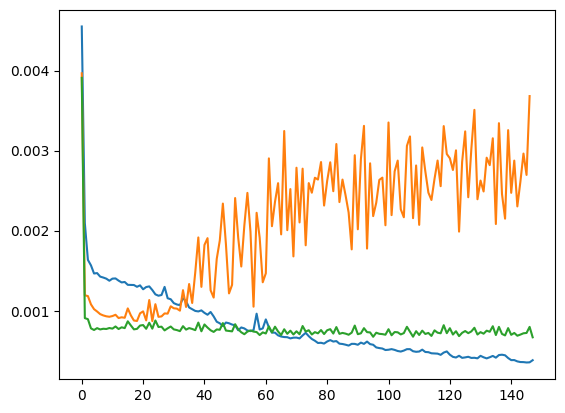

In [77]:
plt.plot(model.train_losses)
plt.plot(model.test_losses)
plt.plot(model.valid_losses)

In [79]:
model, test = model.prepare(test, opt_var.use_gpu)
preds = model.forward(test)["Yhat"]
print(preds.shape)
print(preds)

torch.Size([762, 1])
tensor([[ 5.3814e-02],
        [ 4.1279e-02],
        [ 3.5204e-02],
        [ 1.4022e-02],
        [ 4.2356e-02],
        [ 3.0524e-02],
        [ 3.0399e-02],
        [ 2.9900e-02],
        [ 2.4480e-01],
        [ 3.6430e-02],
        [ 2.9359e-02],
        [ 1.8780e-02],
        [ 7.6840e-03],
        [ 9.1442e-03],
        [ 1.6898e-02],
        [ 9.8983e-02],
        [ 3.1971e-02],
        [ 4.3679e-02],
        [ 3.0561e-02],
        [ 3.3891e-02],
        [ 3.5764e-02],
        [ 3.0575e-02],
        [ 1.1791e-01],
        [ 1.4933e-02],
        [ 4.1308e-02],
        [ 4.3383e-02],
        [ 3.8165e-02],
        [ 4.0073e-02],
        [ 3.4992e-02],
        [ 8.4555e-02],
        [ 1.5017e-02],
        [ 1.2745e-02],
        [ 2.6881e-02],
        [ 1.5651e-02],
        [ 1.6726e-02],
        [ 3.6315e-02],
        [ 1.1096e-01],
        [ 6.1172e-02],
        [ 1.4190e-02],
        [ 1.3776e-02],
        [ 2.9545e-02],
        [ 1.8792e-02],
        [ 3.7

##### Macro-analysis of predicted and true values before and after scaling back

In [80]:
preds = preds.cpu().data.numpy()

In [81]:
pd.DataFrame(preds).describe()

,0
count,762.000000
mean,0.025327
std,0.047487
min,-0.024488
25%,0.007093
50%,0.012919
75%,0.022715
max,0.550589


In [82]:
pd.DataFrame(test_Y).describe()

,0
count,762.000000
mean,0.019746
std,0.033869
min,0.000000
25%,0.003571
50%,0.007143
75%,0.020536
max,0.242857


In [83]:
TestY_final = scaler_2.inverse_transform(test_Y.reshape(-1,1))
TEST_preds_final = scaler_2.inverse_transform(preds.reshape(-1,1))
TestY_final = TestY_final.reshape(-1)
TEST_preds_final = TEST_preds_final.reshape(-1)

In [84]:
pd.DataFrame(TestY_final).describe()

,0
count,762.000000
mean,5.528871
std,9.483360
min,0.000000
25%,1.000000
50%,2.000000
75%,5.750000
max,68.000000


In [85]:
TEST_preds_final

array([ 1.50679207e+01,  1.15582285e+01,  9.85724640e+00,  3.92618704e+00,
        1.18596706e+01,  8.54659176e+00,  8.51165771e+00,  8.37202263e+00,
        6.85434723e+01,  1.02004585e+01,  8.22040176e+00,  5.25829697e+00,
        2.15150690e+00,  2.56036496e+00,  4.73153019e+00,  2.77152710e+01,
        8.95182610e+00,  1.22302132e+01,  8.55711269e+00,  9.48951435e+00,
        1.00140238e+01,  8.56098461e+00,  3.30144997e+01,  4.18131542e+00,
        1.15661659e+01,  1.21471262e+01,  1.06862516e+01,  1.12203426e+01,
        9.79762363e+00,  2.36753120e+01,  4.20471382e+00,  3.56870818e+00,
        7.52678633e+00,  4.38223886e+00,  4.68316841e+00,  1.01682043e+01,
        3.10680923e+01,  1.71281929e+01,  3.97333694e+00,  3.85731244e+00,
        8.27251625e+00,  5.26189518e+00,  1.04336529e+01,  1.28410873e+02,
        6.64493084e+00,  6.27527618e+00,  4.90281630e+00,  6.67436647e+00,
        4.08764610e+01,  2.31050014e+01,  5.13496017e+00,  6.00551844e+00,
        4.44019270e+00,  

In [86]:
for i in range(TEST_preds_final.shape[0]):
    if TEST_preds_final[i] < 0:
        TEST_preds_final[i] = 0 

In [87]:
x_pts = np.arange(0,TEST_preds_final.shape[0] ,1)

##### Plot of predicted values of MLP-GNN vs true values 

<function matplotlib.pyplot.legend(*args, **kwargs)>

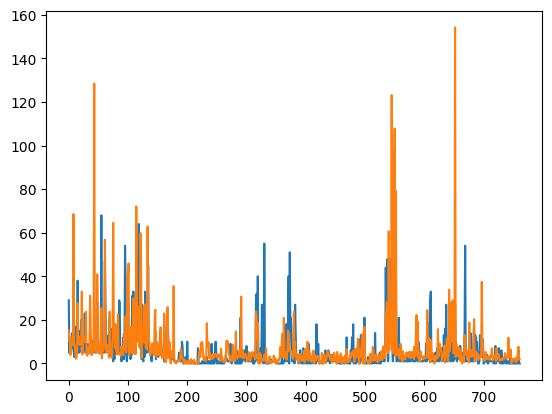

In [88]:
plt.plot(x_pts,TestY_final,TEST_preds_final)
plt.legend

In [89]:
TestY_final

array([29.,  5., 10.,  5.,  5.,  9., 14.,  7., 14.,  3.,  3.,  5., 17.,
        5.,  5., 38.,  5.,  8.,  5., 15.,  8., 20.,  8.,  5.,  5.,  8.,
        7., 23.,  5.,  5.,  5.,  5.,  9.,  5.,  5.,  5.,  5.,  5., 11.,
        5.,  5.,  5.,  5., 20., 14.,  5.,  5.,  5., 28., 13.,  8.,  5.,
        5.,  6.,  5., 68.,  5.,  5.,  6.,  5.,  5., 47., 25., 12.,  5.,
       11.,  7., 13.,  9., 21.,  5.,  5.,  4., 16.,  3.,  1., 11.,  2.,
       17., 14.,  5.,  5.,  5., 10.,  5., 29., 28.,  4.,  5.,  1.,  3.,
        2., 12.,  2.,  9., 54., 36.,  5.,  1., 13., 17., 13., 10.,  7.,
        2.,  3.,  4., 31.,  7., 33., 10.,  7.,  5.,  5., 29., 40., 47.,
       27., 64., 15.,  9.,  7., 16.,  2., 27.,  2.,  1., 20.,  3., 33.,
        7.,  5.,  5., 11., 45., 10.,  5.,  5.,  5.,  2.,  1.,  5.,  5.,
        5.,  5.,  4., 15.,  2.,  5.,  6.,  8.,  3.,  6.,  6., 15., 10.,
       10.,  5.,  5.,  4.,  4.,  1.,  1.,  2.,  1., 17., 23., 15., 12.,
        3.,  8.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1

In [90]:
TEST_preds_final

array([1.50679207e+01, 1.15582285e+01, 9.85724640e+00, 3.92618704e+00,
       1.18596706e+01, 8.54659176e+00, 8.51165771e+00, 8.37202263e+00,
       6.85434723e+01, 1.02004585e+01, 8.22040176e+00, 5.25829697e+00,
       2.15150690e+00, 2.56036496e+00, 4.73153019e+00, 2.77152710e+01,
       8.95182610e+00, 1.22302132e+01, 8.55711269e+00, 9.48951435e+00,
       1.00140238e+01, 8.56098461e+00, 3.30144997e+01, 4.18131542e+00,
       1.15661659e+01, 1.21471262e+01, 1.06862516e+01, 1.12203426e+01,
       9.79762363e+00, 2.36753120e+01, 4.20471382e+00, 3.56870818e+00,
       7.52678633e+00, 4.38223886e+00, 4.68316841e+00, 1.01682043e+01,
       3.10680923e+01, 1.71281929e+01, 3.97333694e+00, 3.85731244e+00,
       8.27251625e+00, 5.26189518e+00, 1.04336529e+01, 1.28410873e+02,
       6.64493084e+00, 6.27527618e+00, 4.90281630e+00, 6.67436647e+00,
       4.08764610e+01, 2.31050014e+01, 5.13496017e+00, 6.00551844e+00,
       4.44019270e+00, 6.28842592e+00, 5.14778042e+00, 2.53805084e+01,
      

In [91]:
TestY_final = TestY_final.reshape(-1)
TEST_preds_final = TEST_preds_final.reshape(-1)
print("The shape of the test predictions",TEST_preds_final.shape)
print("The shape of the True values of test",TestY_final.shape)
print("The shape of the ML-model prediction values of Y",Test_old_pred.shape) 

The shape of the test predictions (762,)
The shape of the True values of test (762,)
The shape of the ML-model prediction values of Y (762,)


In [92]:
TestY_final.shape
#TEST_preds_final.shape
sample_weights = np.ones(TestY_final.shape[0])

In [93]:
for i in range(TestY_final.shape[0]):
    val = TestY_final[i] 
    if 10 < val < 25:
        sample_weights[i] = 5
    elif 25 < val < 50:
        sample_weights[i] = 8
    elif 50 < val < 100:
        sample_weights[i] = 10
    elif val > 100:
        sample_weights[i] = 30

In [94]:
from sklearn.metrics import balanced_accuracy_score

In [95]:
TestY_final_bin = np.ones(TestY_final.shape[0])
TestY_pred_bin = np.ones(TestY_final.shape[0])
ML_pred = np.ones(TestY_final.shape[0])

In [96]:
for i in range(TestY_final.shape[0]):
    if TestY_final[i]<10:
        TestY_final_bin[i]=0
    if TEST_preds_final[i]<10:
        TestY_pred_bin[i]=0
    if Test_old_pred[i]<0.5:
        ML_pred[i] = 0

#### Balanced Accuracy (using sklearn's balanced accuracy feature)

In [97]:
balanced_accuracy_score(TestY_final_bin, TestY_pred_bin)

0.6881619937694704

In [98]:
balanced_accuracy_score(TestY_final_bin, ML_pred)

0.6714174454828661

#### Balanced Accuracy (using sklearn's balanced accuracy feature and self-defined sample_weights)

##### MLP-GNN model

In [99]:
balanced_accuracy_score(TestY_final_bin, TestY_pred_bin,sample_weight=sample_weights)

0.7066696029987292

##### Random forrest model

In [100]:
balanced_accuracy_score(TestY_final_bin, ML_pred,sample_weight=sample_weights)

0.700663886327245

In [101]:
DL_binary_right_predition = 0
DL_binary_wrong_predition = 0
dl_threshold = 10
for i in range(TEST_preds_final.shape[0]):
    if ((TEST_preds_final[i] >= dl_threshold and TestY_final[i] >= 10) or (TEST_preds_final[i] < dl_threshold and TestY_final[i] < 10)):
        DL_binary_right_predition+=1
    else:
        DL_binary_wrong_predition+=1

In [102]:
print("Prediction ", "True") 
for i in range(TEST_preds_final.shape[0]):
    if not ((TEST_preds_final[i] >= dl_threshold and TestY_final[i] >= 10) or (TEST_preds_final[i] < dl_threshold and TestY_final[i] < 10)):
        if (TEST_preds_final[i]-TestY_final[i] > 10):
            print(TEST_preds_final[i],"  ",TestY_final[i]) 

Prediction  True
33.0145    8.0
23.675312    5.0
31.068092    5.0
17.128193    5.0
64.49625    1.0
16.347063    2.0
13.861447    2.0
12.756918    1.0
16.701141    3.0
26.197609    9.0
59.76333    7.0
14.650448    2.0
19.438324    4.0
22.927444    1.0
35.507603    2.0
18.475021    3.0
14.689451    0.0
30.646492    0.0
20.908619    1.0
23.698954    2.0
24.128883    8.0
60.36393    9.0
11.972471    1.0
22.16311    9.0
19.172626    1.0
15.73814    1.0
11.371057    1.0
33.83786    6.0
27.88145    1.0
28.981108    5.0
18.79967    4.0
37.436733    3.0
11.810287    0.0


#### Generic MLP-GNN Accuracy

In [103]:
dl_acc = DL_binary_right_predition/TestY_final.shape[0] * 100
print("Deep learning accuracy is:", dl_acc)

Deep learning accuracy is: 83.98950131233596


In [104]:
ML_binary_right_predition = 0
ML_binary_wrong_predition = 0
ml_threshold = 0.5
for i in range(TEST_preds_final.shape[0]):
    if ((Test_old_pred[i] >= ml_threshold and TestY_final[i] > 10) or (Test_old_pred[i] < ml_threshold and TestY_final[i] < 10)):
        ML_binary_right_predition+=1
    else:
        ML_binary_wrong_predition+=1

### Generic Random forrest accuracy

In [105]:
ml_acc = ML_binary_right_predition/TestY_final.shape[0] * 100
print("Machine learning accuracy is:",ml_acc)

Machine learning accuracy is: 86.74540682414698


In [106]:
DL_true_positive = 0
DL_true_negative = 0
DL_false_positive = 0
DL_false_negative = 0
dl_threshold = 10


for i in range(TEST_preds_final.shape[0]):
    
    if (TEST_preds_final[i] >= dl_threshold and TestY_final[i] >= 10): 
        DL_true_positive+=1
    
    elif (TEST_preds_final[i] < dl_threshold and TestY_final[i] < 10):
        DL_true_negative+=1
        
    elif (TEST_preds_final[i] >= dl_threshold and TestY_final[i] < 10):
        DL_false_positive+=1
        
    else:
        DL_false_negative+=1
        
DL_true_positive = DL_true_positive/TestY_final.shape[0] * 100
DL_true_negative = DL_true_negative/TestY_final.shape[0] * 100
DL_false_positive = DL_false_positive/TestY_final.shape[0] * 100
DL_false_negative = DL_false_negative/TestY_final.shape[0] * 100
DL_false_positive

7.611548556430446

#### Calculation of confusion_matrix terms

In [107]:
ML_true_positive = 0
ML_true_negative = 0
ML_false_positive = 0
ML_false_negative = 0
ml_threshold = 0.5

for i in range(TEST_preds_final.shape[0]):
    
    if (Test_old_pred[i] >= ml_threshold and TestY_final[i] >= 10): 
        ML_true_positive+=1
    
    elif (Test_old_pred[i] < ml_threshold and TestY_final[i] < 10):
        ML_true_negative+=1
        
    elif (Test_old_pred[i] >= ml_threshold and TestY_final[i] < 10):
        ML_false_positive+=1

    else:
        ML_false_negative+=1
        
ML_true_positive = ML_true_positive/TestY_final.shape[0] * 100
ML_true_negative = ML_true_negative/TestY_final.shape[0] * 100
ML_false_positive = ML_false_positive/TestY_final.shape[0] * 100
ML_false_negative = ML_false_negative/TestY_final.shape[0] * 100
ML_false_positive

3.4120734908136483

In [108]:
ML_false_negative

9.711286089238845

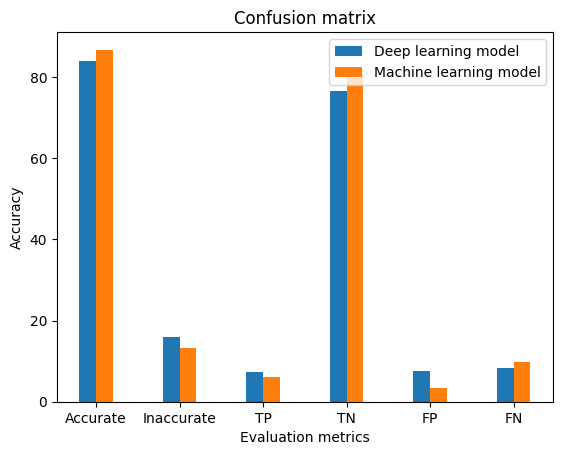

In [109]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Accurate', 'Inaccurate' , 'TP','TN','FP','FN']
dl = [dl_acc, (100 - dl_acc), DL_true_positive,DL_true_negative,DL_false_positive,DL_false_negative]
ml = [ml_acc, (100 - ml_acc), ML_true_positive,ML_true_negative,ML_false_positive,ML_false_negative]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, dl, 0.2, label = 'Deep learning model')
plt.bar(X_axis + 0.1, ml, 0.2, label = 'Machine learning model')
  
plt.xticks(X_axis, X)
plt.xlabel("Evaluation metrics")
plt.ylabel("Accuracy")
plt.title("Confusion matrix")
plt.legend()
plt.show()

#### Calculation of accuracy when the task is to divide the nodes into multiple classes (Multi-class classification)

In [110]:
DL_0_to_10 = 0
DL_10_to_25 = 0
DL_25_to_50 = 0
DL_50_to_100 = 0
DL_above_100 = 0

for i in range(TEST_preds_final.shape[0]):
    
    
    if (0  <= TEST_preds_final[i] <= 10 and 0 <= TestY_final[i] <= 10):
        DL_0_to_10+=1
    
    elif (10 < TEST_preds_final[i] <= 25 and 10 < TestY_final[i] <= 25): 
        DL_10_to_25+=1
    
    elif (25 < TEST_preds_final[i] <= 50 and 25 < TestY_final[i] <= 50):
        DL_25_to_50+=1
        
    elif(50 < TEST_preds_final[i] <= 100 and 50 < TestY_final[i] <= 100):
        DL_50_to_100+=1
        
    elif((100 < TEST_preds_final[i] and 100 < TestY_final[i])):
        DL_above_100+=1

In [111]:
(DL_0_to_10 + DL_10_to_25 + DL_25_to_50 + DL_50_to_100 + DL_above_100) / TEST_preds_final.shape[0] * 100

80.5774278215223